# Proposte visualizzazioni - Intro

In [120]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import yaml

#importo i dati, i ranking e i colori
palette = open("palette.yml")
palette = yaml.load(palette, Loader=yaml.FullLoader)
dataset = pd.read_csv("../dataset_with_clusters.csv", index_col = 0)
rankings = pd.read_csv("../SRANKresults.csv", index_col = 0, sep = ";")

#modifico il dataset dei punti per avere le medie sui cluster di ogni variabile
dataset["index"] = dataset["Clusters"].apply(lambda x: "Cluster {}".format(x))
data_mean = dataset.groupby("index").mean()
data_mean = data_mean.rename(columns = {"Feature" : "nClusters"})
#l'indice si chiama nClusters... non so perchè

#variabili di clustering
cluster_var = ['Age', 'IncomeNeed', 'RiskPropension', 'ProtectionNeed', 'InheritanceIndex']

#ora setto lo stile di seaborn
sns.set_style(
                {
                     'axes.facecolor': palette["slides"]["gray_bg"],
                     'axes.edgecolor': palette["slides"]["gray_bg"],
                     'axes.grid': True,
                     'axes.axisbelow': True,
                     'axes.labelcolor': palette["slides"]["black"],
                     'figure.facecolor': palette["slides"]["gray_bg"],
                     'grid.color': palette["slides"]["gray_fg"],
                     'grid.linestyle': '-',
                     'text.color': palette["slides"]["black"],
                     'xtick.color': palette["slides"]["black"],
                     'ytick.color': palette["slides"]["black"],
                     'xtick.direction': 'out',
                     'ytick.direction': 'out',
                     'lines.solid_capstyle': 'round',
                     'patch.edgecolor': palette["slides"]["black"],
                     'patch.force_edgecolor': True,
                     'image.cmap': 'rocket',
                     'font.family': ['sans-serif'],
                     'font.sans-serif': ['Helvetica'],
                     'xtick.bottom': False,
                     'xtick.top': False,
                     'ytick.left': False,
                     'ytick.right': False,
                     'axes.spines.left': True,
                     'axes.spines.bottom': True,
                     'axes.spines.right': False,
                     'axes.spines.top': False
                }
            )
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

{'slides': {'blue': '#55b6ff',
  'darker_blue': '#2e69b8',
  'gray_bg': '#f0f4f6',
  'gray_fg': '#bcbebf',
  'gray_middle': '#e2e5e7',
  'black': '#1e1e1e',
  'white': '#ecf6fe',
  'orange': '#f66321'},
 'elements': {'pink': '#D91D81',
  'yellow': '#e0c600',
  'violet': '#9f00ff',
  'green': '#29bf12'}}

# Organizzazione del notebook
* Visualizzazioni per il ranking delle variabili
* Visualizzazioni per la descrizione del singolo cluster
* Visualizzazioni per il confronto fra cluster

# Ranking delle variabili

Text(0.5, 0, 'Score \n Max = 100')

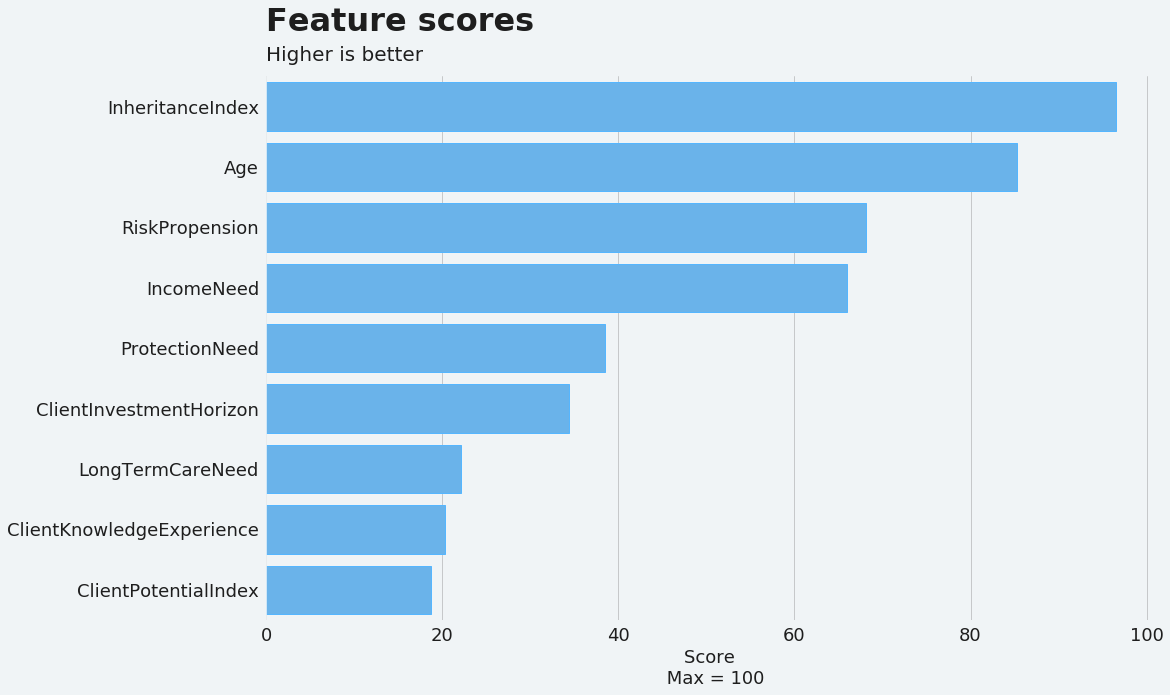

In [109]:
#RANKING DELLE VARIABILI
#basta un normale barplot dove i punteggi sono normalizzati a 100
MAX_POINTS = 320
rankings["score_norm"] = rankings["score_final"].apply(lambda x : x*100/320)

#eccolo
plt.figure(figsize = (16, 10))
sns.barplot(x = "score_norm", 
            y = "feature",
            color = palette["slides"]["blue"],
            edgecolor = palette["slides"]["blue"],
            data = rankings)
plt.text(x = 0, y = -1.25, s = "Feature scores", fontsize = 32, fontweight = "bold")
plt.text(x = 0, y = -0.75, s = "Higher is better", fontsize = 20)
plt.ylabel("")
plt.xlabel("Score \n Max = 100")

# Descrizione del singolo cluster

## Variabili di clustering

Per mostrare come si distribuiscono le variabili all'interno di ogni cluster ho pensato di discretizzare i valori da 1 a 10, e di fare dei grafici a barre.

L'età media del cluster invece la riporterei come numero (brutto, in cerca di idee).

In questo modo, essendo un _punteggio_ si può tenere in conto di una certa variabilità senza dover ricorrere agli intervalli di confidenza.

In ogni caso nelle slide di supporto metterei dei grafici più precisi, che mostrano le distribuzioni in ogni singolo cluster, come dei violin plots.

### Plot principale

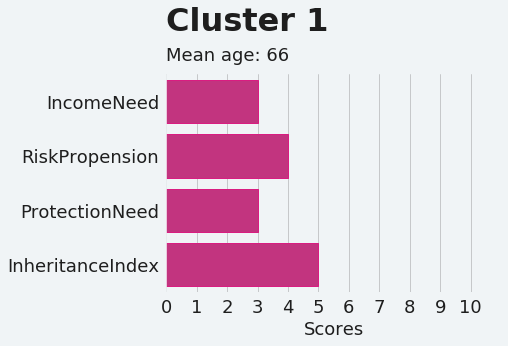

In [157]:
#prima discretizzo le variabili del dataset delle medie
cluster_var_d = []
for var in cluster_var:
    var_d = var + "_d"
    cluster_var_d.append(var_d)
    data_mean[var_d] = data_mean[var].apply(lambda x : round(x*10))

#tranne age
data_mean["Age_d"] = data_mean["Age"].apply(lambda x : round(x))

#poi faccio la trasposizione del dataset per poter plottare
data_mean_T = (data_mean[cluster_var_d]
                  .transpose()
                  .reset_index()
                  .rename(columns = {"index" : "feature"}))
data_mean_T["features"] = data_mean_T["feature"].apply(lambda x : x[:-2])
data_mean_T.drop(columns = "feature", inplace = True)

#ora il barplot
sns.barplot(x = "Cluster 0", 
            y = "features", 
            data = data_mean_T.iloc[1:], 
            color = palette["elements"]["pink"], 
            edgecolor = palette["elements"]["pink"])
plt.ylabel("")
plt.xlabel("Scores")
plt.text(x = 0, y = -1.30, s = "Cluster 1", fontsize = 32, fontweight = "bold")
plt.text(x = 0, y = -0.75, 
         s = "Mean age: {}".format(data_mean_T.loc[0]["Cluster 1"]), 
         fontsize = 18)
plt.xlim((0, 11))
plt.xticks([x for x in range(11)])
plt.show()

Problemi, come visualizzare l'incertezza.. si deve?